In [3]:
from sklearn import datasets
# 过滤法选择特征，标准有方差，卡方检验，互信息，相关系数
# 方差选择
from sklearn.feature_selection import VarianceThreshold
#卡方：f_classif，F分布；chi2,卡方；f_regression,回归。
from sklearn.feature_selection import SelectKBest,f_classif,chi2,f_regression#按照个数保留特征
from sklearn.feature_selection import SelectPercentile#按照比例保留特征
#相关系数
from scipy.stats import pearsonr
#互信息
from sklearn import metrics as mr
#用法 mr.mutual_info_score(label,x)

In [4]:
#导入数据集
wine=datasets.load_wine()
x,y=wine.data,wine.target

In [12]:
#方差选择
#不能先将特征规划化，不然方差都为1
wine_x=x
selector=VarianceThreshold(1)
selector.fit(wine_x)

print('Variances is %s'%selector.variances_)
print('After transform is \n%s'%selector.transform(wine_x))
print('The surport is %s'%selector.get_support(True))#如果为True那么返回的是被选中的特征的下标
print('The surport is %s'%selector.get_support(False))#如果为FALSE那么返回的是布尔类型的列表，反应是否选中这列特征
#print('After reverse transform is \n%s'%selector.inverse_transform(selector.transform(wine_x)))
#方差太不好控制了，阀值难以取舍，并且数据规范化不能在方差取特征之前进行，不然方差很小，难以取出特征

Variances is [6.55359730e-01 1.24100408e+00 7.48418003e-02 1.10900306e+01
 2.02843328e+02 3.89489032e-01 9.92113512e-01 1.54016191e-02
 3.25754248e-01 5.34425585e+00 5.19514497e-02 5.01254463e-01
 9.86096010e+04]
After transform is 
[[1.710000e+00 1.560000e+01 1.270000e+02 5.640000e+00 1.065000e+03]
 [1.780000e+00 1.120000e+01 1.000000e+02 4.380000e+00 1.050000e+03]
 [2.360000e+00 1.860000e+01 1.010000e+02 5.680000e+00 1.185000e+03]
 [1.950000e+00 1.680000e+01 1.130000e+02 7.800000e+00 1.480000e+03]
 [2.590000e+00 2.100000e+01 1.180000e+02 4.320000e+00 7.350000e+02]
 [1.760000e+00 1.520000e+01 1.120000e+02 6.750000e+00 1.450000e+03]
 [1.870000e+00 1.460000e+01 9.600000e+01 5.250000e+00 1.290000e+03]
 [2.150000e+00 1.760000e+01 1.210000e+02 5.050000e+00 1.295000e+03]
 [1.640000e+00 1.400000e+01 9.700000e+01 5.200000e+00 1.045000e+03]
 [1.350000e+00 1.600000e+01 9.800000e+01 7.220000e+00 1.045000e+03]
 [2.160000e+00 1.800000e+01 1.050000e+02 5.750000e+00 1.510000e+03]
 [1.480000e+00 1.68

In [14]:
#chi2检验数组必须为非负数，标准化会产生负数
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#规范化可以去除犅量的影响，提升模型效率
sc=MinMaxScaler()
#sc=MinMaxScaler()
wine_x=sc.fit_transform(x)
print('before transform:\n',wine_x)
selector2=SelectKBest(score_func=chi2,k=8)
selector2.fit(wine_x,y)
#chi2值
print('scores_:\n',selector2.scores_)
#p值
print('pvalues_:',selector2.pvalues_)
#特征编号，True返回数组索引，False返回各列特征选择情况，True为选中，False为未选中
print('selected index:',selector2.get_support(True))
#未进行数据规范化，选中特征索引为[ 1  3  4  5  6  9 11 12]
#规范化后，选中特征为[ 0  1  5  6  9 10 11 12]


before transform:
 [[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]
scores_:
 [ 9.45400066  8.11858304  0.9346697   3.31958248  1.64131331  9.40177031
 16.05097687  5.34608154  3.9813523  12.45315712  8.44940247 16.67767772
 18.79203469]
pvalues_: [8.85298728e-03 1.72612440e-02 6.26670214e-01 1.90178678e-01
 4.40142537e-01 9.08722992e-03 3.27020260e-04 6.90419652e-02
 1.36603030e-01 1.97620180e-03 1.46297049e-02 2.39049752e-04
 8.30541840e-05]
selected index: [ 0  1  5  6  9 10 11 12]


In [18]:
#F检验检验数组可以为负值
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#规范化可以去除犅量的影响，提升模型效率
#sc=StandardScaler()
#sc=MinMaxScaler()
#wine_x=sc.fit_transform(x)
print('before transform:\n',x)
selector3=SelectKBest(score_func=f_classif,k=8)
selector3.fit(x,y)
#chi2值
print('scores_:\n',selector3.scores_)
#p值
print('pvalues_:',selector3.pvalues_)
#特征编号，True返回数组索引，False返回各列特征选择情况，True为选中，False为未选中
print('selected index:',selector3.get_support(True))
#未进行数据规范化，选中特征索引为[ 0  1  5  6  9 10 11 12]
#标准化后，选中特征为[ 0  1  5  6  9 10 11 12]

before transform:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
scores_:
 [135.07762424  36.94342496  13.3129012   35.77163741  12.42958434
  93.73300962 233.92587268  27.57541715  30.27138317 120.66401844
 101.31679539 189.97232058 207.9203739 ]
pvalues_: [3.31950380e-36 4.12722880e-14 4.14996797e-06 9.44447294e-14
 8.96339544e-06 2.13767002e-28 3.59858583e-50 3.88804090e-11
 5.12535874e-12 1.16200802e-33 5.91766222e-30 1.39310496e-44
 5.78316836e-47]
selected index: [ 0  1  5  6  9 10 11 12]


In [20]:
#F检验检验数组可以为负值
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#规范化可以去除犅量的影响，提升模型效率
#sc=StandardScaler()
#sc=MinMaxScaler()
#wine_x=sc.fit_transform(x)
print('before transform:\n',x)
#使用保留百分比个数，这里保留50%
selector4=SelectPercentile(score_func=f_classif,percentile=50)
selector4.fit(x,y)
#chi2值
print('scores_:\n',selector4.scores_)
#p值
print('pvalues_:',selector4.pvalues_)
#特征编号，True返回数组索引，False返回各列特征选择情况，True为选中，False为未选中
print('selected index:',selector4.get_support(True))
#未进行数据规范化，选中特征索引为[ 0  1  5  6  9 10 11 12]
#标准化后，选中特征为[ 0  1  5  6  9 10 11 12]

before transform:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
scores_:
 [135.07762424  36.94342496  13.3129012   35.77163741  12.42958434
  93.73300962 233.92587268  27.57541715  30.27138317 120.66401844
 101.31679539 189.97232058 207.9203739 ]
pvalues_: [3.31950380e-36 4.12722880e-14 4.14996797e-06 9.44447294e-14
 8.96339544e-06 2.13767002e-28 3.59858583e-50 3.88804090e-11
 5.12535874e-12 1.16200802e-33 5.91766222e-30 1.39310496e-44
 5.78316836e-47]
selected index: [ 0  6  9 10 11 12]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


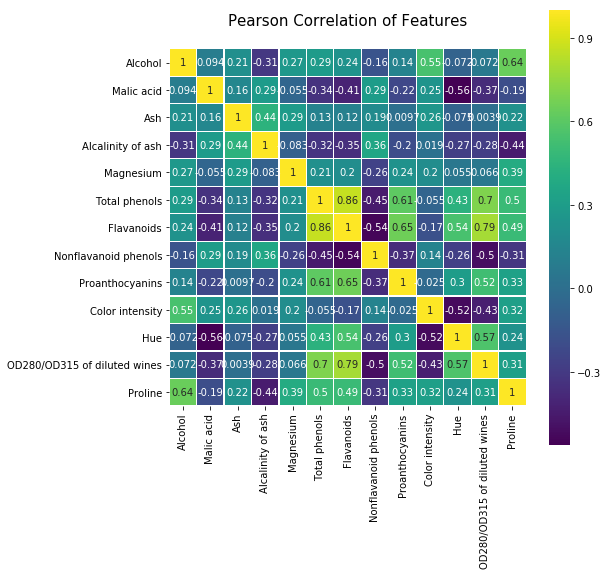

In [42]:
#相关系数可以计算两种，特征之间的相关系数，特征与目标的相关系数
#特征之间的相关系数，用pandas的corr可以计算
import pandas as pd
import matplotlib.pyplot as plt
col=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
     'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine_df=pd.DataFrame(x,columns=col)
colormap=plt.cm.viridis
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(wine_df.corr(),linewidths=0.1,vmax=1,square=True,cmap=colormap,linecolor='white',annot=True)
plt.show()

In [65]:
#目标值与特征间相关系数，取前最大的k项
from scipy.stats import pearsonr
corr=[]
p=[]
for i in wine_df.columns:
    re=list(pearsonr(wine_df[i],y))
    corr_value,p_value=re[0],re[1]
    corr.append(abs(corr_value))
    p.append(p_value)
corr=np.array(corr)
p=np.array(p)
chose=np.argsort(-corr)[:8]
print(chose)
print(np.sort(chose))
#结果为[ 3  5  6  7  8 10 11 12

[ 6 11  5 12 10  3  8  7]
[ 3  5  6  7  8 10 11 12]


In [73]:
#互信息
Mi={}
x_T=x.T
for i in range(len(x[0])):
    Mi[i]=mr.mutual_info_score(x.T[i],y)
    
X_MIF = [each for each in Mi if Mi[each]>=sorted(Mi.values(),reverse=True)[8]]
print('选择的特征对应列序号：',X_MIF)
结果为：[0, 1, 5, 6, 8, 9, 10, 11, 12]

选择的特征对应列序号： [0, 1, 5, 6, 8, 9, 10, 11, 12]
